In [95]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from scipy import stats
import plotly.express as px


Added this extra for test

In [96]:
# we start by importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import folium
from folium import  Marker
from folium.plugins import HeatMap, HeatMapWithTime
from IPython.display import IFrame
import plotly.express as px
from urllib.request import urlopen
import json
import webbrowser
import os
import math
from sklearn.cluster import KMeans
import bokeh
from bokeh.models import ColumnDataSource,FactorRange
from bokeh.plotting import figure, show, output_file

In [97]:

df_crime = pd.read_csv("police_report.csv") 

#Convert to datetime. OBS allready done so i don't have to run it again
df_crime['Year'] = pd.to_datetime(df_crime['Date']).dt.year

#Remove where year = 2018 (we don't have the whole year so we decide to remove it)
df_crime = df_crime[df_crime['Year'] != 2018]

df_crime.head()


#Count the number of crimes pr year
year_count = df_crime["Year"].value_counts()

In [98]:

df_drugs = df_crime[df_crime["Category"] == "DRUG/NARCOTIC"]
#Count the number of crimes in total
drugs_count = df_drugs["Year"].value_counts()
#print(drugs_count)


In [99]:
#Look at the unique types of descriptions
#print(df_drugs["Descript"].unique())


In [100]:
#make date as a datetime object
df_drugs['Date'] = pd.to_datetime(df_crime['Date'])

C:\Users\marir\AppData\Local\Temp\ipykernel_180184\1824424506.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\marir\AppData\Local\Temp\ipykernel_180184\503433250.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



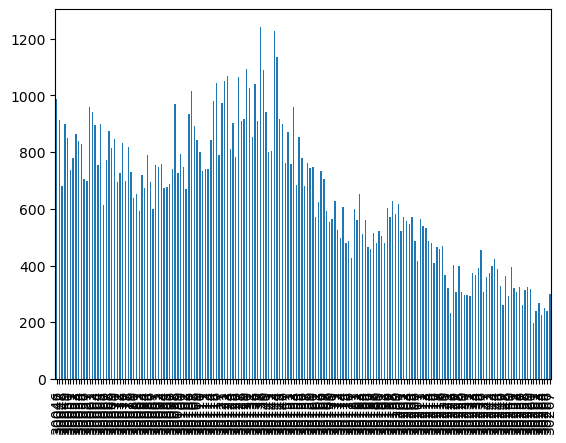

In [101]:
#Make a colunm that counts the month 
#MOnth of the year
df_drugs['MonthofYear'] = df_drugs['Date'].dt.year*15 + df_drugs['Date'].dt.month
df_drugs

#Plot over the month of year 
df_drugs["MonthofYear"].value_counts().sort_index().plot(kind='bar')
plt.show()

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_drugs is your DataFrame
# First, create a pivot table to aggregate the counts by Year and PdDistrict
pivot_table = df_drugs.pivot_table(index='Year', columns='PdDistrict', aggfunc='size', fill_value=0)

# Now, create the bar plot using seaborn
# create a stacked bar plot so it can be saved htlm
fig = plt.figure()
# Save the plot as a html file

fig = px.bar(pivot_table, barmode='stack',
                      color_discrete_sequence = px.colors.sequential.Viridis)
#fig size
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title="Drug and narcotics reports by district and year",
    xaxis_title="Year",
    yaxis_title="Count",
    legend_title="District",
    #colour of the bars
    #color_discrete_sequence=px.colors.qualitative.Polar
)

fig.show()
fig.write_html("barplot_drugs.html")


<Figure size 640x480 with 0 Axes>

In [103]:
#Count the districts with the most crime counts
df_drugs["PdDistrict"].value_counts()

TENDERLOIN    37365
SOUTHERN      20356
MISSION       18787
NORTHERN      10390
BAYVIEW        9569
PARK           5685
INGLESIDE      4963
CENTRAL        3924
TARAVAL        3189
RICHMOND       2124
Name: PdDistrict, dtype: int64

In [104]:
#make a barplot for the 3 districts tenderloin, southern and mission seperately
df_drugs_tenderloin = df_drugs[df_drugs["PdDistrict"] == "TENDERLOIN"]
df_drugs_southern = df_drugs[df_drugs["PdDistrict"] == "SOUTHERN"]
df_drugs_mission = df_drugs[df_drugs["PdDistrict"] == "MISSION"]


tenderloin_year_counts = df_drugs_tenderloin["Year"].value_counts()
southern_year_counts = df_drugs_southern["Year"].value_counts()
mission_year_counts = df_drugs_mission["Year"].value_counts()

year_district_count = df_drugs_tenderloin["Year"].value_counts()


In [109]:
import matplotlib.pyplot as plt
from matplotlib import cm  # Import colormap
year_district_counts = df_drugs.groupby(["Year", "PdDistrict"]).size().unstack().fillna(0)


fig = plt.figure(figsize=(15, 10), filename='testing.html')

gs = fig.add_gridspec(3, 2, width_ratios=[3, 1])  # Adjusted to 2 columns
ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2, 1])

#fill the fist plot
# Plot data into each subplot
#make a stacked barplot of the crime count with different colored districts
# Plot stacked barplot of crime count per year, colored by district using the 'viridis' colormap
bottom = np.zeros(len(year_district_counts.index))
colors = cm.viridis(np.linspace(0, 1, len(year_district_counts.columns)))
for i, district in enumerate(year_district_counts.columns):
    bars = ax0.bar(year_district_counts.index, year_district_counts[district], bottom=bottom, label=district, color=colors[i])
    print("color of district", colors[i], district)
    bottom += year_district_counts[district]

ax0.set_title('Drug-Related Crime Count per Year (Stacked by District)')
ax0.set_xlabel('Year')
ax0.set_ylabel('Crime Count')
ax0.legend()

#Make the second plot
# Plot crime count per year for TENDERLOIN
#use the same color as for the previous plot
ax1.bar(tenderloin_year_counts.index, tenderloin_year_counts.values, color=colors[9])
ax1.set_title('Crime Count per Year - Tenderloin')
ax1.set_ylabel('Crime Count')
ax1.set_xticks([])

#The third plot
# Plot crime count per year for SOUTHERN
#use the same color as for the previous plot
ax2.bar(southern_year_counts.index, southern_year_counts.values, color=colors[7])
ax2.set_title('Crime Count per Year - Southern')
ax2.set_ylabel('Crime Count')
#Make the range go from 0 to 5000
ax2.set_ylim([0, 5000])
#remove the x-axis legend
ax2.set_xticks([])

#The third plot
# Plot crime count per year for SOUTHERN
#use the same color as for the previous plot
ax3.bar(mission_year_counts.index, mission_year_counts.values, color=colors[3])
ax3.set_title('Crime Count per Year - Mission')
ax3.set_ylabel('Crime Count')
ax3.set_ylim([0, 5000])
#put a bit more years on the x-axis
ax3.set_xticks(mission_year_counts.index[::2])
plt.xticks(rotation=45)


plt.show()
gs.write_html("barplot_drugs.html")


AttributeError: Figure.set() got an unexpected keyword argument 'filename'

In [ ]:
#Find the area of each district
# Calculate the area of each district in square kilometers
district_areas = {
    "TENDERLOIN": 0.38,
    "SOUTHERN": 17.65,
    "MISSION": 7.22,
    "CENTRAL": 3.01,
    "BAYVIEW": 9.28,
    "NORTHERN": 6.02,
    "INGLESIDE": 12.27,
    "TARAVAL": 14.62,
    "PARK": 5.24,
    "RICHMOND": 8.07
}

#divide the number of crimes per year for each district with the area of the district
# Calculate the crime density per year for each district




year_district_density = year_district_counts.copy()
for district in year_district_density.columns:
    year_district_density[district] /= district_areas[district]

year_district_density





PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Year,,,,,,,,,,
2003,93.318966,105.980066,28.443358,286.842105,126.744186,72.709924,17.100372,115.524079,15.800274,6913.157895
2004,119.073276,105.980066,29.013855,263.988920,143.189369,62.786260,18.959108,93.597734,15.526676,7586.842105
2005,83.405172,57.142857,25.183374,216.481994,122.757475,66.793893,11.152416,67.932011,15.321477,7957.894737
2006,87.068966,75.415282,29.095355,263.434903,149.003322,76.526718,20.446097,73.031161,13.201094,7115.789474
2007,83.943966,99.335548,36.756316,210.249307,151.328904,107.824427,22.304833,97.280453,14.090287,9826.315789
2008,62.823276,130.232558,32.844336,228.947368,116.445183,90.458015,16.976456,110.821530,22.913817,12689.473684
2009,75.431034,127.242525,31.947840,205.540166,131.893688,114.694656,22.924411,114.560907,28.385773,12618.421053
2010,69.612069,86.378738,44.987775,188.365651,123.089701,85.496183,25.898389,97.960340,15.800274,7526.315789
2011,69.504310,60.132890,26.324368,133.656510,95.016611,67.366412,15.737299,69.291785,16.552668,5713.157895


In [ ]:
#calculate the total number of crimes in each district
# Calculate the total number of crimes in each district
district_counts = df_drugs["PdDistrict"].value_counts()
district_counts

TENDERLOIN    37365
SOUTHERN      20356
MISSION       18787
NORTHERN      10390
BAYVIEW        9569
PARK           5685
INGLESIDE      4963
CENTRAL        3924
TARAVAL        3189
RICHMOND       2124
Name: PdDistrict, dtype: int64

In [ ]:
#Take the first colunm of the dataframe
year_district_density

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Year,,,,,,,,,,
2003,93.318966,105.980066,28.443358,286.842105,126.744186,72.709924,17.100372,115.524079,15.800274,6913.157895
2004,119.073276,105.980066,29.013855,263.988920,143.189369,62.786260,18.959108,93.597734,15.526676,7586.842105
2005,83.405172,57.142857,25.183374,216.481994,122.757475,66.793893,11.152416,67.932011,15.321477,7957.894737
2006,87.068966,75.415282,29.095355,263.434903,149.003322,76.526718,20.446097,73.031161,13.201094,7115.789474
2007,83.943966,99.335548,36.756316,210.249307,151.328904,107.824427,22.304833,97.280453,14.090287,9826.315789
2008,62.823276,130.232558,32.844336,228.947368,116.445183,90.458015,16.976456,110.821530,22.913817,12689.473684
2009,75.431034,127.242525,31.947840,205.540166,131.893688,114.694656,22.924411,114.560907,28.385773,12618.421053
2010,69.612069,86.378738,44.987775,188.365651,123.089701,85.496183,25.898389,97.960340,15.800274,7526.315789
2011,69.504310,60.132890,26.324368,133.656510,95.016611,67.366412,15.737299,69.291785,16.552668,5713.157895


In [ ]:
#sum the year_district_density dataframe
dist_rel_count = year_district_density.sum(axis=0)
dist_rel_count

year_district_density.iloc[0]

PdDistrict
BAYVIEW         93.318966
CENTRAL        105.980066
INGLESIDE       28.443358
MISSION        286.842105
NORTHERN       126.744186
PARK            72.709924
RICHMOND        17.100372
SOUTHERN       115.524079
TARAVAL         15.800274
TENDERLOIN    6913.157895
Name: 2003, dtype: float64

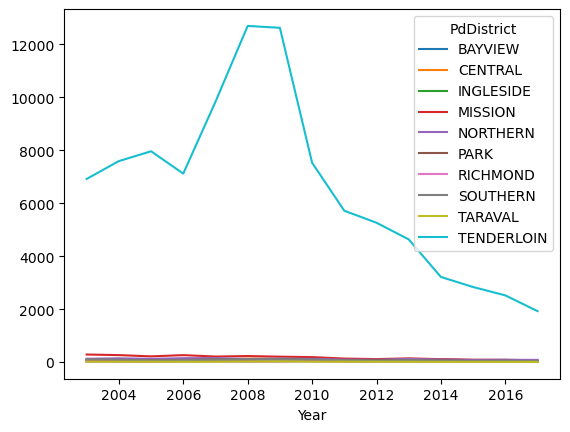

In [ ]:




#make a lineplot for all districts
year_district_density.plot(kind='line')
plt.show()

<Axes: xlabel='Year'>

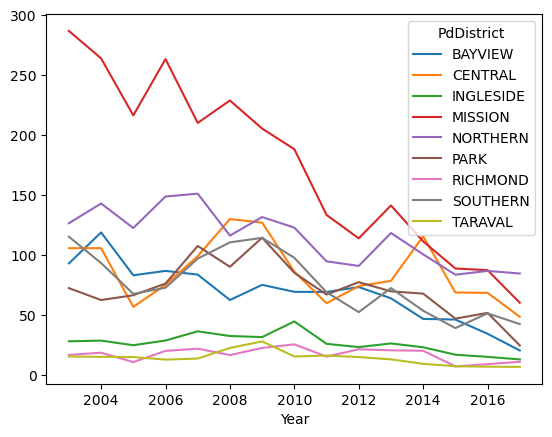

In [ ]:
#make a lineplot for all districts except for the tenderloin
year_district_density.drop(columns='TENDERLOIN').plot(kind='line')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from scipy import stats
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import calplot
from urllib.request import urlopen
import json
#from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [ ]:
import plotly.express as px
import geopandas as gpd

url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'
gdf = gpd.read_file(url)

gdf

,id,OBJECTID,DISTRICT,COMPANY,geometry
0,CENTRAL,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8..."
1,SOUTHERN,2,SOUTHERN,B,"MULTIPOLYGON (((-122.38822 37.79000, -122.3880..."
2,BAYVIEW,3,BAYVIEW,C,"POLYGON ((-122.39342 37.70841, -122.39349 37.7..."
3,MISSION,4,MISSION,D,"POLYGON ((-122.40802 37.76940, -122.40767 37.7..."
4,PARK,5,PARK,F,"POLYGON ((-122.44665 37.77588, -122.44683 37.7..."
5,RICHMOND,6,RICHMOND,G,"POLYGON ((-122.44805 37.78237, -122.44804 37.7..."
6,INGLESIDE,7,INGLESIDE,H,"POLYGON ((-122.40830 37.70833, -122.41009 37.7..."
7,TARAVAL,8,TARAVAL,I,"POLYGON ((-122.45552 37.71099, -122.45560 37.7..."
8,NORTHERN,9,NORTHERN,E,"POLYGON ((-122.44565 37.80537, -122.44399 37.8..."
9,TENDERLOIN,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7..."


In [ ]:
#reindex district_count with the id of gdf
district_counts = district_counts.reindex(gdf["id"])

gdf["drug_arrest"] = district_counts.values

#reindex year dist count with the id of gdf
dist_rel_count = dist_rel_count.reindex(gdf["id"])

gdf['rel dist count'] = dist_rel_count.values
gdf

,id,OBJECTID,DISTRICT,COMPANY,geometry,drug_arrest,rel dist count
0,CENTRAL,1,CENTRAL,A,"POLYGON ((-122.40532 37.80687, -122.40440 37.8...",3924,1303.654485
1,SOUTHERN,2,SOUTHERN,B,"MULTIPOLYGON (((-122.38822 37.79000, -122.3880...",20356,1153.314448
2,BAYVIEW,3,BAYVIEW,C,"POLYGON ((-122.39342 37.70841, -122.39349 37.7...",9569,1031.142241
3,MISSION,4,MISSION,D,"POLYGON ((-122.40802 37.76940, -122.40767 37.7...",18787,2602.077562
4,PARK,5,PARK,F,"POLYGON ((-122.44665 37.77588, -122.44683 37.7...",5685,1084.923664
5,RICHMOND,6,RICHMOND,G,"POLYGON ((-122.44805 37.78237, -122.44804 37.7...",2124,263.197026
6,INGLESIDE,7,INGLESIDE,H,"POLYGON ((-122.40830 37.70833, -122.41009 37.7...",4963,404.482478
7,TARAVAL,8,TARAVAL,I,"POLYGON ((-122.45552 37.71099, -122.45560 37.7...",3189,218.125855
8,NORTHERN,9,NORTHERN,E,"POLYGON ((-122.44565 37.80537, -122.44399 37.8...",10390,1725.913621
9,TENDERLOIN,10,TENDERLOIN,J,"POLYGON ((-122.41795 37.78602, -122.41654 37.7...",37365,98328.947368


In [ ]:
print(gdf['rel dist count'].max())
print(gdf['rel dist count'].min())
gdf['rel dist count']

98328.94736842105
218.12585499316003


0     1303.654485
1     1153.314448
2     1031.142241
3     2602.077562
4     1084.923664
5      263.197026
6      404.482478
7      218.125855
8     1725.913621
9    98328.947368
Name: rel dist count, dtype: float64

In [ ]:
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color='rel dist count',
    color_continuous_scale="Sunset",
    range_color=(gdf['rel dist count'].min(), gdf['rel dist count'].max()),  # Adjusted range for your data
    mapbox_style="carto-positron",
    zoom=10,  
    center={"lat": 37.7749, "lon": -122.4194},  # Coordinates for San Francisco
    opacity=0.5,
    labels={'VALUE': 'Drug reportings', 'DISTRICT': 'DISTRICT'},  # Define hover labels
    hover_data={'DISTRICT': True, 'rel dist count': True},  # Specify columns for hover labels
    hover_name='DISTRICT'  # Specify column for hover labels
)

# Update figure
fig.update_layout(
    title_text='Total drug reportings in per district in San Fransisco relative to the district area',
    title_x=0.5,  # Set x-coordinate to center the title
    title_y=0.95,  # Set y-coordinate for vertical positioning
    width=1000,  # Set the width of the plot
    height=800  # Set the height of the plot
)

# Show the map
fig.show()


In [ ]:
year_district_density.iloc[0]

PdDistrict
BAYVIEW         93.318966
CENTRAL        105.980066
INGLESIDE       28.443358
MISSION        286.842105
NORTHERN       126.744186
PARK            72.709924
RICHMOND        17.100372
SOUTHERN       115.524079
TARAVAL         15.800274
TENDERLOIN    6913.157895
Name: 2003, dtype: float64

In [ ]:
#size of year_district_density
year_district_density.shape



(15, 10)

Text(0.5, 0, 'Year')

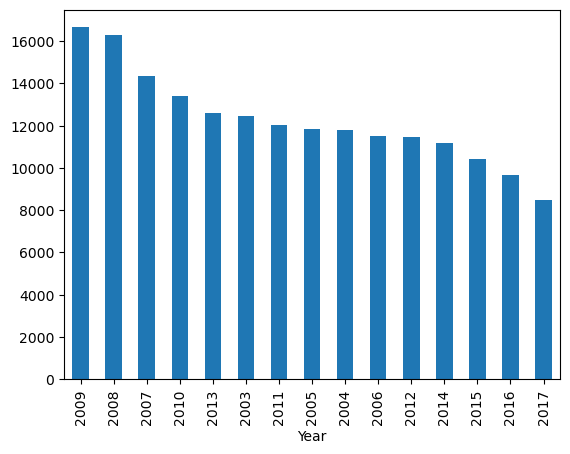

In [ ]:
#Number of crime occurences in Terderloin over the years
tenderloin_year_counts = df_crime[df_crime["PdDistrict"] == "TENDERLOIN"]["Year"].value_counts()
tenderloin_year_counts

plot = tenderloin_year_counts.plot(kind='bar')
plot.set_xlabel("Year")


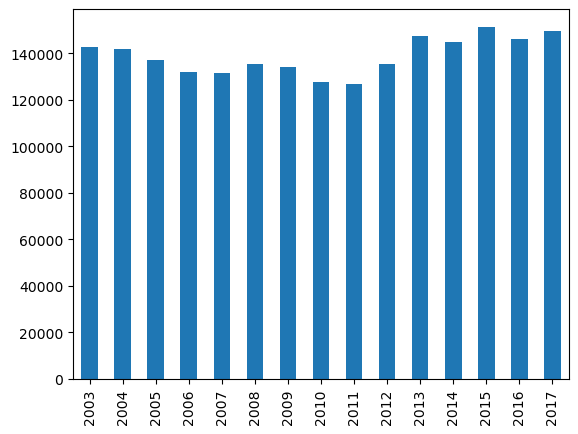

In [ ]:
#count the number of instances in df_crimes for every year
year_count = df_crime["Year"].value_counts()
#reindex year count according to the year
year_count = year_count.reindex(range(2003, 2018))
year_count

#plot the count of crimes per year
year_count.plot(kind='bar')
plt.show()

<Axes: >

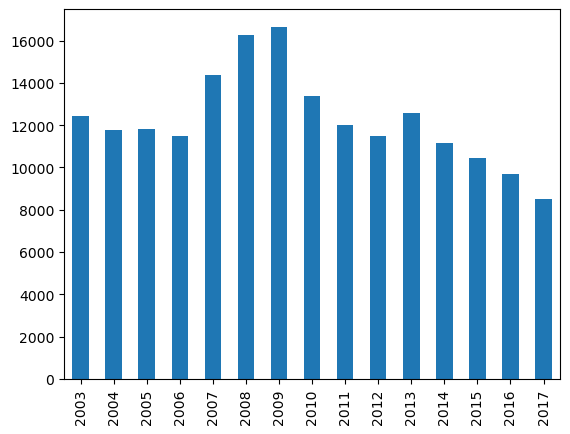

In [ ]:
#look at the number of instances for each year for the district tenderloin
df_crime_tenderloin = df_crime[df_crime["PdDistrict"] == "TENDERLOIN"]
tenderloin_year_count = df_crime_tenderloin["Year"].value_counts()

#reindex the count according to the year
tenderloin_year_count = tenderloin_year_count.reindex(range(2003, 2018))
#plot
tenderloin_year_count.plot(kind='bar')

<Axes: >

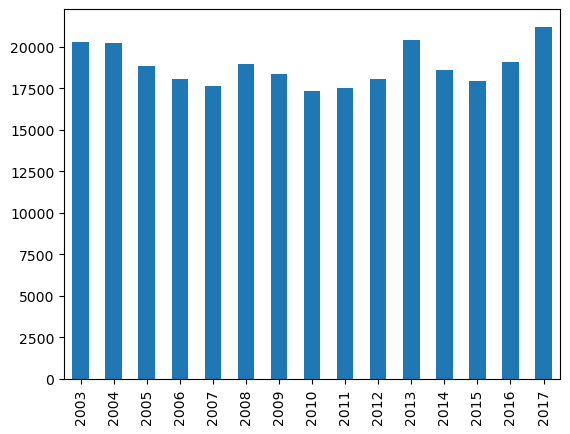

In [ ]:
#now the same for the district southern

df_crime_southern = df_crime[df_crime["PdDistrict"] == "MISSION"]
southern_year_count = df_crime_southern["Year"].value_counts()
southern_year_count = southern_year_count.reindex(range(2003, 2018))
southern_year_count.plot(kind='bar')



NameError: name 'Ecstasy' is not defined

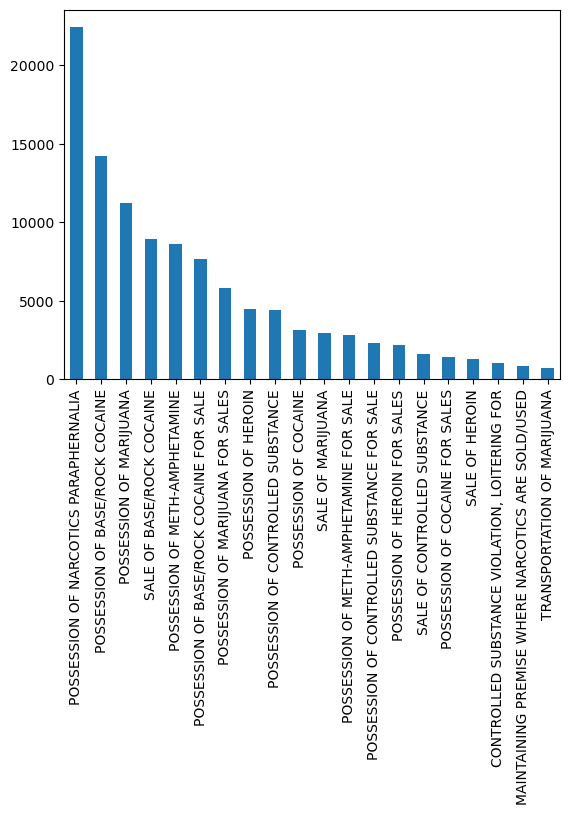

In [ ]:
#Investigate the different types of drugs?

#print the head of the dataf

#count the number of instances for each discription
df_drugs["Descript"].value_counts()

#Plot the distribution of the different types of drugs
#df_drugs["Descript"].value_counts().plot(kind='bar')

#Print only the first 10
df_drugs["Descript"].value_counts().head(20).plot(kind='bar')

#Make a list of all the types of drugs
drugs = {"Cocain", 
         "Heroin",
         "Methamphetamine",
         Ecstasy,
         Marijuana,
         Crack,
         Opium,
         Hallucinogen,
         Amphetamine,
         Barbiturate,
         Tranquilizer,
         Narcotic,
         Steroid,
         paraphernalia}


In [ ]:
df_death = pd.read_csv("Unintentional_Drug_Overdose.csv") 
df_death.head()


,race_ethnicity,year,overdose_death_rate,overdose_death_count,population_size,data_as_of,data_loaded_at
0,All races,2022,78.5,635,808437,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
1,"Asian/Pacific Islander, Non-Hispanic/Latinx",2022,10.5,35,332462,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
2,"Black/African American, Non-Hispanic/Latinx",2022,399.7,166,41531,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
3,Hispanic/Latinx,2022,96.8,124,128162,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
4,"White, Non-Hispanic/Latinx",2022,84.6,259,306282,2023/09/11 05:49:34 PM,2023/09/14 12:22:53 PM
